## Introduction

In [this]() earlier blog post, I covered how to solve Tic-Tac-Toe using the classical Minimax algorithm. Here we will use Reinforcement Learning to solve the same problem. 

This should give you an overview of this branch of AI in a familiar setting. As argued in this [paper](https://www.sciencedirect.com/science/article/pii/S0004370221000862) by pioneers in the field, RL could be the key to Artifical General Intelligence. Therefore, it would behoove us to better understand this discipline.

## Introduction to Reinforcement Learning

I will refer you to this [post](https://lilianweng.github.io/lil-log/2018/02/19/a-long-peek-into-reinforcement-learning.html) by someone way smarter than me if you want to really spend some time understanding Reinforcement Learning.

I will just skim the surface in this section. Feel free to skip this section entirely.

![](RL.png)

As shown in the figure above, the reinforcement learning framework comprises the following elements

1) **Agent** : Entity learning about the environment and making decisions. We need to specify a learning algorithm for the agent that allows it to learn a policy <br>
2) **Environment**: Everything outside the agent, including other agents <br>
3) **Rewards**: Numerical quanitities that represent feedback from the environment that an agent tries to maximize <br>
    - Goal reward representation: 1 for goal, 0 otherwise
    - Action penalty representation: -1 for not goal, 0 once goal is reached
4) **State**: A representation of the environment. At time step $t$,the agent is in state $S_t \in \mathcal{S}$ where $\mathcal{S}$ is the set of all possible states <br>
5) **Action**: At time step $t$, an agent takes an action $A_t \in \mathcal{A}(S_t)$ where $\mathcal{A}(S_t)$ is the set of actions available in state $S_t$ <br>
6) **Policy**: A policy tells the agent what action to take in a given state. $\pi(a|S$)

A policy can be deterministic i.e. there is one action that is deterministically selected in a given state $\pi(s)=a$,
or   stochastic i.e. the policy maps a state onto a set of probabilties for taking each action. $\mathbb{P}[a^i|s] < 1$  subject to $ \sum_i \mathbb{P}[a^i|s] =1$

To solve a problem using RL, we should be able to formulate it as a markov decision process (MDP).

### Markov Decision Process

In an MDP, the environment is completely characterized by the **transition dynamics equation** $$p(s',r|s,a)$$
That is, the probability of each possible value for $s'$ (the subsequent state) and $r$ (reward) depends only on the immediately preceding state and action, $s$ and $a$, and, given them, not at all on earlier states and actions. In other words, given the present, the future is independent of the past.

**The state must include information about all aspects of the past agent–environment interaction that make a difference for the future. If it does, then the state is said to have the *Markov property***

If the transtion dynamics equation is fully known by the agent, it means an optimal policy can be computed without interacting with the environment. This is **planning**. Some kind of search algorithm can be used here.<br>

When the environment is not fully known, the agent has to learn by interacting with the environment. i.e. **learning**. If an agent constructs a model of the environment , it is called **model based RL**, else it is called **model free RL**.

If you are contructing a self driving car, learning from real experience can be too expensive so you want to build a model of then environment which you can query for information to make decisions.

When an agent in state $S_t$ takes an action $A_t$ as prescribed by a policy $\pi$, it transitions to a state $S_{t+1}$ and receives a reward $R_{t+1}$. The Agent interacting with the **MDP** environment thus gives rise to a sequence or trajectory

$$S_0,A_0,R_1,S_1,A_1,R_2,S_2,...$$

The goal of an agent is to maximize the long term reward or return.

Long term reward or return is formally defined as the discounted sum of future rewards.

$$G_t = R_{t+1} + \gamma R_{t+2} + \gamma R_{t+3} +... = \sum_{k=0}^{\infty} \gamma^k R_{t+k+1} $$

$$ = R_{t+1} + \gamma G_{t+1} $$

## Value Functions

To navigate an environment optimally, we need the concept of a value function that comes in two flavours

1) State Value Function <br>
2) Action Value Function

The **State - Value function** of a state $s$ under a policy $\pi$,is the expected return from following policy $\pi$ when starting in state $s$
$$v_{\pi}(s) \doteq \mathbb{E}_{\pi}[G_t | S_t =s]  $$

The **Action-Value function** is the value of taking action $a$ in state $s$ under policy $\pi$ and thereafter following the policy $\pi$

$$q_{\pi}(s,a) \doteq \mathbb{E}_{\pi}[G_t| S_t =s ,A_t=a] $$

## Bellman Equations

The above defintions of the state and action value functions suggest equations to evaluate them known as Bellman Equations.

**The Bellman expectation equation for the state value function** follows naturally from the above defintion of the state value function.

$$v_{\pi}(s) \doteq \mathbb{E}[G_t | S_t =s]  $$ <br>
$$ = \mathbb{E}_{\pi}[R_{t+1} + \gamma G_{t+1} | S_t =s]  $$ <br>
$$ = \sum_{a} \pi(a|s) \sum_{s'}\sum_{r} p(s',r|s,a) \Big[ r + \gamma \mathbb{E}_{\pi}[G_{t+1}|S_{t+1} = s']\Big]$$<br>
$$ \sum_{a} \pi(a|s) \sum_{s',r}  p(s',r|s,a) [r + \gamma v_{\pi}(s')] $$

This is easily understood from the backup diagram shown below.

![backup](backup.png)

The value of a state $s$ is obtained by considering all possible paths to all possible successor states , and weighting the rewards obtained and value of these successor states by the probabilities of taking each path.

**The Bellman expectation equation for the action value function** is similarly given by

$$q_{\pi}(s,a) \doteq \mathbb{E}_{\pi}[G_t| S_t =s ,A_t=a] $$

$$ = \mathbb{E}_{\pi}[R_{t+1} + \gamma G_{t+1} | S_t =s',A_t=a']  $$ <br>

$$ =  \sum_{s',r} p(s',r|s,a)[r + \gamma \sum_{a'} \pi(a'|s')q_{\pi}(s',a')] $$

To make this idea concrete, we can calculate the state and value functions for the simplified version of the example we covered in the previous blog post.We will assume that there is only a single player carrying out a series of actions  following a random policy with an equal probability of taking either action - **L** or **R**

We will assume the discount factor $\gamma = 1 $

![](RL_my_image2.png)

The value of any given state is derived from the value of the successor states.E.g.
$$V_{\pi}(B) = 0.5V_{\pi}(D) + 0.5 V_{\pi}(E)  = 0.5 \times 4 + 0.5 \times 3 = 3.5$$

Once the value of the successive states are known, the agent can pick the action that leads to the optimal state. 
In this example, the agent wants to move to state B, and takes action "L" to move to that state. A limitation of the state value funciton is that once you have determines the optimal state, you have to then identify the action that leads to that state.

The action value function does not have this limitation, it directly gives the value of each action at a given state making it easy to pick the optimal actions.

The action-value function at states B, C and A are given by

$$Q(\mathcal{S}=B,\mathcal{A}=L) = 4 $$
$$Q(\mathcal{S}=B,\mathcal{A}=R) = 3 $$
$$Q(\mathcal{S}=C,\mathcal{A}=L) = 2 $$
$$Q(\mathcal{S}=C,\mathcal{A}=R) = 1 $$
$$Q(\mathcal{S}=A,\mathcal{A}=L) = 3.5 $$
$$Q(\mathcal{S}=A,\mathcal{A}=R) = 1.5 $$

## Optimal Policy

**Theorem** <br>
For any MDP <br>
- There exists an optimal policy $\pi_*$, that is better than or equal to all other policies, $\pi_* \ge \pi, \forall \pi $ 
- All optimal policies achieve the optimal value function $v_{\pi_*} = v_*(s)$
- All optimal policies achieve optimal action-value function, $q_{\pi_*}(s,a) = q_*(s,a)$

An optimal policy can be found by maximizing over the optimal value function
$$\pi_*(s) = \underset{a} \arg\max q_*(s,a)$$

$q_*(s,a)$ is given by the **Bellman optimality equations**

**The Bellman Optimality equation for state values** is given by

$$ v_*(s) =  \max_{a} \sum_{s',r}  p(s',r|s,a) [r + \gamma v_{\pi}(s')] $$

**The Bellman Optimality equation for action-values** is given by

$$ q_{*}(s,a) = \sum_{s',r} p(s',r|s,a)[r + \gamma\ \underset{a'}max \ \pi(a'|s')q_{\pi}(s',a')] $$


All RL algorithms solve for the Bellman Equations exactly or approximately.  To solve the Tic-Tac-Toe, I will use an algorithm called **Q-Learning**. I will not not go into details of Q-Learning as there are plenty of free online resources that cover this.

### Design

To solve this problem I will create a TicTacToe class that represents the board as a player sees it. Each of the two players retain their own copy of the board. This is possibly an inefficient design, but this is what I will run with.

Given tic-tac-toe is a 2 player game, I essentially simulate two different environemnts. In the first one, the agent is player X and in the second one the agent is player Y.

After the agent plays, the move by the opposing player is considered a change in the environment resulting from the agent's actions. The new state the agent lands in is a board where the opposing player has already made his/her move.


In [21]:
import numpy as np
from itertools import product
import pandas as pd
import random
from collections import defaultdict
from tqdm import tqdm
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
class TicTacToe():
    def __init__(self,player = 'X',reward_type ='goal_reward'):
        '''
        player: Role agent should play. If X, agent has the first turn else agent has second turn
        reward_type: 'goal_reward' or 'action_penalty'
        '''
        self.board = np.array(['__']*9).reshape(3,3)
        self.reward_type = reward_type
        self.winning_seqeunce = None #Keep track of winning move made by agent
        self.first_move = None #Keep track of first move made by agent
        if player == 'X':
            self.me ='X'
            self.id = 1
            self.opponent = 'O'
        else:
            self.me = 'O'
            self.id = 2
            self.opponent = 'X'
     
        self.game_over = False #Flag indicating whether game is over
        # Mapping of action representaion in board to action representation in tuple 
        self.b_to_s = {'__':0,'X':1,'O':2} 
        # Mapping of action representaion in tuple to action representation in board
        self.s_to_b = {0:'__',1:'X',2:'O'} 
        
        #Create mapping from 2D position in board to 1D position in tuple
        positions = self.available_positions()
        self.b2_to_s1 = {position:i for (i,position) in enumerate(positions)}
        
        #Create mapping from 1D position in tuple to 2D position in board 
        self.s1_to_b2 = {i:position for (i,position) in enumerate(positions)}
        
        #State the current player is in
        self.starting_state = self.board_to_state()
        
        #Initialize all possible states of the game
        l_o_l = [list(range(3)) for _ in range(9)]
        states = set(product(*l_o_l))
        

        
        #Player X states include states with odd number of blanks and both players have occupied equal number of slots
        #Player O playes after Player X, so player O states include states with even number of blanks and where
        #player X has occupied one more slot than player O
        playerX_states = {state for state in states if (state.count(0)%2 == 1 and state.count(1)==state.count(2))} #
        playerO_states =  {state for state in states if (state.count(0)%2 == 0 and state.count(1)==(state.count(2)+1))}
        
        #States 
        #self.board_full_states = {state for state in states if state.count(0)==0}
        if player == 'X':
            self.my_states = playerX_states
        else:
            self.my_states = playerO_states
          
    
    def reset_board(self):
        "Function to reset game and reset board to starting state"
        self.board = np.array(['__']*9).reshape(3,3)
        self.starting_state = self.board_to_state()
        self.game_over = False
        self.winning_sequence = None
        self.first_move = None
    
    def show_board(self):    
        "Shows board as a pandas dataframe"
        return pd.DataFrame(self.board)
    
    def board_to_state(self):
        "Convert a board to a state in tuple format"
        return tuple([self.b_to_s[x] for x in np.ravel(self.board)])
    
    @staticmethod
    def possible_actions(state):
        "Return possible actions given a state"
        return [i for i,x  in enumerate(state) if x ==0]
    

        
    def is_game_over(self):
        "Function to check if game is over"
        if not np.any(self.board == '__') :
            self.game_over = True
            
        return self.game_over
    
    def available_positions(self):
        "Return available positions on the board"
        x,y = np.where(self.board =='__')
        return[(x,y) for x,y in zip(x,y)]
    
    
    def win(self,player):
        "Check if player won the game and record the winning sequence"
        if np.all(self.board[0,:] == player):
            self.winning_sequence = 'R1'
        elif np.all(self.board[1,:] == player): 
            self.winning_sequence = 'R2'
        elif np.all(self.board[2,:] == player):
            self.winning_sequence = 'R3'
        elif np.all(self.board[:,0] == player):
            self.winning_sequence = 'C1'
        elif np.all(self.board[:,1] == player):
            self.winning_sequence = 'C2'
        elif np.all(self.board[:,2] == player):
            self.winning_sequence = 'C3'
        elif np.all(self.board.diagonal()==player):
            self.winning_sequence = 'D1'
        elif  np.all(np.fliplr(self.board).diagonal()==player):
            self.winning_sequence = 'D2'
        else:
            return False
        
        return True
    
    
    def my_move(self,position):
        "Fills out the board in the given position with the action of the agent"
        
        assert position[0] >= 0 and position[0] <= 2 and position[1] >= 0 and position[1] <= 2 , "incorrect position"
        assert self.board[position] == "__" , "position already filled"
        assert np.any(self.board == '__') , "Board is complete"
        assert self.win(self.me) == False and self.win(self.opponent)== False , " Game has already been won"
        self.board[position] = self.me
        
        I_win = self.win(self.me)
        opponent_win = self.win(self.opponent)
        
        if self.reward_type == 'goal_reward':
            if I_win:
                self.game_over = True
                return 1
            
            elif opponent_win:
                self.game_over = True
                return -1
            
            else:
                return 0
            
        elif self.reward_type == 'action_penalty':
            if I_win:
                self.game_over = True
                return 0
            
            elif opponent_win:
                self.game_over = True
                return -10
            
            else:
                return -1
    
    def opponent_move(self,position):
        "Fills out the board in the given position with the action of the opponent"
        assert position[0] >= 0 and position[0] <= 2 and position[1] >= 0 and position[1] <= 2 , "incorrect position"
        assert self.board[position] == "__" , "position already filled"
        assert np.any(self.board == '__') , "Board is complete"
        assert self.win(self.me) == False and self.win(self.opponent)== False , " Game has already been won"
        self.board[position] = self.opponent
            

#     def get_action(self,next_state):
#         " return action that will take agent to the specified next state"
#         current_state = self.board_to_state()
#         return [i for (i,j) in enumerate(current_state) if current_state[i]==0 and next_state[i]==self.id][0]
        
        
    
    def pick_best_action(self,Q,action_type,eps=None):
        '''Given a Q function return optimal action
        If action_type is 'greedy' return best action with ties broken randomly else return epsilon greedy action
        '''
        #Get possible actions
        current_state = self.board_to_state()
        actions =  self.possible_actions(current_state)
        
        best_action = []
        best_action_value = -np.Inf
        
        for action in actions:
            Q_s_a = Q[current_state][action]
            if Q_s_a == best_action_value:
                best_action.append(action)
            elif Q_s_a > best_action_value:
                best_action = [action]
                best_action_value = Q_s_a
        best_action = random.choice(best_action)

        if action_type == 'greedy':
            return self.s1_to_b2[best_action]
        else:
            assert eps != None , "Include epsilon parameter"
            n_actions =len(actions) #No of legal actions 
            p = np.full(n_actions,eps/n_actions)
            #Get index of best action
            best_action_i = actions.index(best_action)
            p[best_action_i]+= 1 - eps
            return self.s1_to_b2[np.random.choice(actions,p=p)]
    
            

Below is a demonstration of how this class works. Let us assume the we are training Player X to play the game.

In [23]:
t_board_X = TicTacToe(player = 'X',reward_type ='goal_reward')

In [24]:
t_board_X.show_board()

,0,1,2
0,__,__,__
1,__,__,__
2,__,__,__


We will alternate between moves for X and Y until the game ends with player X winning

In [25]:
t_board_X.my_move((0,0))
t_board_X.show_board()

,0,1,2
0,X,__,__
1,__,__,__
2,__,__,__


In [26]:
t_board_X.opponent_move((0,1))
t_board_X.show_board()

,0,1,2
0,X,O,__
1,__,__,__
2,__,__,__


In [27]:
t_board_X.my_move((1,0))
t_board_X.opponent_move((1,1))
t_board_X.my_move((2,0))

1

In [28]:
t_board_X.show_board()

,0,1,2
0,X,O,__
1,X,O,__
2,X,__,__


## Utility Functions

The following primary utility functions will be used. Please refer to the jupyter notebook for the definitions of these functions


1) `play_games` :This function simulates games between the two players a specified number of times and returns relevant statistics from the game <br>
2) `get_win_statistics` : This functions simulates the specified number of games N times(equivalent to sets in a tennis game) and returns statistics
collected across these sets <br>
3) `plot_results` : This function visualizes the statistics collected <br>
4) `initialize_Q` : Randomly initialize a Q table for the given player <br>
5) `train`: Function to train the agent using the Q-Learning algorithm


In [29]:
def play_games(n_games,Q_X,Q_O,X_strategy = 'eps_greedy',O_strategy='eps_greedy',eps_X=0.05,eps_O=0.05,seed=1):
    """ Function to play tic tac toe specified no of times, and return summary of win statistics
        n_games: No of times to play the game
        Q_X: Q function for player X that gives X's policy
        Q_O: Q function for player O that gives O's policy
        X_strategy: eps_greedy or greedy
        O_strategy: eps_greedy or greedyj
        
    """
    np.random.seed(seed)
    #Dictionary for holding results of simulation
    win_stats = defaultdict(int)
    #List to  hold winning sequences of the winning player
    winning_sequences_X = []
    winning_sequences_O = []
    
    
    #List of final boards
    final_boards = []
   
    t_board_X = TicTacToe(player = 'X',reward_type ='action_penalty')
    t_board_O = TicTacToe(player = 'O',reward_type ='action_penalty')
    X_first_actions = [] #List to record first actions of player X
    O_first_actions = [] #List to record first actions of player O
    winning_X_first_actions = [] #List to record first actions that resulted in wins
    winning_O_first_actions = [] #List to record first actions that resulted in wins
    
    for i in tqdm(range(n_games),position = 0 ,leave=True):
         #Boards for players X and O
        first_action_flag = True
        while True:
            #X plays first
            x_action = t_board_X.pick_best_action(Q_X,action_type=X_strategy,eps=eps_X)
            if first_action_flag == True:
                X_first_actions.append(x_action)
                
            t_board_X.my_move(x_action) #make move on X's board
            t_board_O.opponent_move(x_action) #make same move on O's board
            if t_board_X.is_game_over(): #need to end game here if X makes the winning move
                break
            #O plays second
            o_action = t_board_O.pick_best_action(Q_O,action_type=O_strategy,eps=eps_O)
            if first_action_flag == True:
                O_first_actions.append(o_action)
                first_action_flag = False
            t_board_O.my_move(o_action) #make move on O's board
            t_board_X.opponent_move(o_action) #make same move on X's board
            if t_board_O.is_game_over(): #need to end game here if O makes the winnng move
                break
        #Check who won game or if game was drawn
        if t_board_X.win('X'):
            win_stats['X_win'] += 1
            winning_sequences_X.append(t_board_X.winning_sequence)
            winning_X_first_actions.append(X_first_actions[-1])
            
        elif t_board_X.win('O'):
            win_stats['O_win'] += 1
            winning_sequences_O.append(t_board_O.winning_sequence)
            winning_O_first_actions.append(O_first_actions[-1])
        else:
            win_stats['Draw'] += 1
        final_boards.append(t_board_X.show_board())
        t_board_X.reset_board()
        t_board_O.reset_board()
    
    return win_stats,final_boards,winning_sequences_X,winning_sequences_O,X_first_actions, \
            O_first_actions,winning_X_first_actions,winning_O_first_actions
            
    

Below we define a function to run simulations of the game and return essential statistics.

In [30]:
def get_win_statistics(Q_X,Q_O,sets = 5, games_in_set = 100,X_strategy = 'eps_greedy',O_strategy='eps_greedy', \
                       eps_X=1.0,eps_O=1.0):
    
    """
    Function to get winning statistics by pitting competing strategies. 
    Q_X: Q table representing the strategy of X
    Q_O: Q Table representing the strategy of O
    sets: No of sets to be played
    games_in_set: No of games in each set
    X_strategy: greedy or epsilon greedy
    O_strategy: greedy or epsilon greedy
    eps_X and eps_O: epsilon in case of epsilon greedy strategy, set to 1 for random strategy
    """
    win_stats_list = []
    winning_sequences_X_list = []
    winning_sequences_O_list = []
    X_first_actions_list = []
    O_first_actions_list = []
    winning_X_first_actions_list = []
    winning_O_first_actions_list = []

    for i in range(sets):
        win_stats, _ ,winning_sequences_X,winning_sequences_O,X_first_actions,O_first_actions, \
        winning_X_first_actions,winning_O_first_actions=  play_games(n_games=games_in_set,\
                            Q_X=Q_X,Q_O=Q_O,X_strategy = X_strategy,O_strategy=O_strategy,eps_X=eps_X,eps_O=eps_O,seed=i)
        win_stats_list.append(win_stats)
        winning_sequences_X_list.append(winning_sequences_X)
        winning_sequences_O_list.append(winning_sequences_O)
        X_first_actions_list.append(X_first_actions)
        O_first_actions_list.append(O_first_actions)
        winning_X_first_actions_list.append(winning_X_first_actions)
        winning_O_first_actions_list.append(winning_O_first_actions)
        
        #Unwrap these lists
    flatten =  lambda l:[item for sublist in l for item in sublist] 
    winning_sequences_X_list = flatten(winning_sequences_X_list)
    winning_sequences_O_list = flatten(winning_sequences_O_list)
    X_first_actions_list = flatten(X_first_actions_list)
    O_first_actions_list = flatten(O_first_actions_list)
    winning_X_first_actions_list = flatten(winning_X_first_actions_list)
    winning_O_first_actions_list = flatten(winning_O_first_actions_list)
    
    win_stats_df  = pd.DataFrame(win_stats_list)
#     stats = win_stats_df.describe()
#     lb = stats.loc['mean'] - 2 * stats.loc['std'] 
#     ub = stats.loc['mean'] + 2 * stats.loc['std']
#     results_df = pd.concat([lb,ub],axis=1)
#     results_df.columns= ['mu - 2 sd', 'mu + 2 sd']
    
    return (win_stats_df),(winning_sequences_X_list,winning_sequences_O_list),\
    (X_first_actions_list,winning_X_first_actions_list),(O_first_actions_list, winning_O_first_actions_list)
            


Another set of utility functions to process win statistics

In [31]:
#Mapping from 2D position to 1D position
map_2d_1d = {(0, 0): 0, (0, 1): 1,(0, 2): 2, (1, 0): 3, (1, 1): 4,(1, 2): 5,(2, 0): 6,(2, 1): 7,(2, 2): 8}

def get_win_rate(first_actions_list,winning_first_actions_list):
    "Get win rate in appropriate format from experiment results"
    first_actions = dict(Counter(first_actions_list))
    winning_first_actions = dict(Counter(winning_first_actions_list))
    win_rate = np.array([winning_first_actions.get(key,0)/first_actions.get(key,1) \
                         for key in sorted(map_2d_1d.keys())]).reshape(3,3)
    
    return win_rate


def get_win_seqs(winning_sequences_list):
    "Get winning sequence stats in appropriate format from experiment results"
    temp_dict = dict(Counter(winning_sequences_list))
    win_seq_df = pd.DataFrame({'winning_sequence':list(temp_dict.keys()),'N':list(temp_dict.values())})
    
    return win_seq_df
    
        

And a function to visualize the statistics

In [32]:
def plot_results(win_statistics):
    "Function to visualize results of experiments"
    sns.set(font_scale=5)
    final_results,winning_sequences,first_actions_X,first_actions_O = win_statistics
    win_stats_df_long = pd.melt(final_results,var_name='Result',value_name='N')
    plt.subplots_adjust(hspace = 2)
    fig, axs = plt.subplots(nrows = 2, ncols=3,figsize=(100,40))
    bplot = sns.boxplot(x="Result",y="N",data=win_stats_df_long, \
                ax=axs[0,0]).set_title("Distribution of Wins,Losses and Ties")

    #Plot aggregate results
    final_results_agg = pd.DataFrame(final_results.apply(sum,0),columns=["N"])
    final_results_agg.reset_index(level=0,inplace=True)

    splot = sns.barplot(x="index",y="N",data=final_results_agg,ax=axs[0,1])
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, -12), 
                       textcoords = 'offset points')
    splot.set_title('Total No of Wins,Losses and Ties')

    win_rate_X = get_win_rate(*first_actions_X)
    win_rate_O = get_win_rate(*first_actions_O)

    _ = sns.heatmap(win_rate_X,annot=True,ax=axs[0,2]).set_title("Player X: % of wins for first move")
    _ = sns.heatmap(win_rate_O,annot=True,ax=axs[1,0]).set_title("Player O: % of wins for first move")

    #Gets stats of winning sequences for player X and player O
    win_seq_X = get_win_seqs(winning_sequences[0])
    win_seq_O = get_win_seqs(winning_sequences[1])

    _ = sns.barplot(x='winning_sequence',y='N',data=win_seq_X,
           order=['R1','R2','R3','C1','C2','C3','D1','D2'],ax=axs[1,1]).set_title("Player X: winning sequences")

    _ = sns.barplot(x='winning_sequence',y='N',data=win_seq_O,
           order=['R1','R2','R3','C1','C2','C3','D1','D2'],ax=axs[1,2]).set_title("Player O: winning sequences")

    plt.show()
    #Reset font size for future plots
   
    

Another utility function we need is one to randomly intialize the Q table which encapsulates a policy by quantifing the value of each state and action.

In [33]:
def initialize_Q(S,seed = 1):
    "Given a state assign random values to each possible action"
    np.random.seed(seed)
    Q = {}
    for state in S:
        Q[state]= {}
        for i,x  in enumerate(state): # Loop through action
            if x == 0:
                Q[state][i] = np.random.rand()
    
    return Q

In [34]:
def moving_average(x, w):
    "Function to calculate moving average of rewards"
    return np.convolve(x, np.ones(w), 'valid') / w

In [35]:
def train(n_games=1000,alpha = 0.5, gamma = 0.9,train_X=True,train_O=False,is_random=True,**kwargs):
    """
    Function to train a player in a game of tic-tac-toe
    Arguments:
        n_games: Number of games on which to train
        alpha: Learning rate
        gamme: discount factor
        train_X: Flag indicating whether player X should be trained
        train_O: Flag inficating whether player O should be trained
        is_random: should actions of untrained agent be random or deterministic according to Q table
    
    """
     
    
    # If Q is not provided, randomize intially, if provided, it will be used to select actions greedily
    if "Q_X" in kwargs:
        action_type_X = "greedy"
        assert train_X == False ,"Train flag should be set to False if Q table is being provided"
        Q_X = kwargs["Q_X"]
    else:
        Q_X = initialize_Q(States_X)
        
    if "Q_O" in kwargs:
        action_type_O = "greedy"
        assert train_O == False ,"Train flag should be set to False if Q table is being provided"
        Q_O = kwargs["Q_O"]
    else:
        Q_O = initialize_Q(States_O)
    
    
    #Set epsilon value conditional on whether we are training X or O
    eps_ = lambda flag,i: 0.05*0.99**i if flag else 1.0
    
    
    #Lists to keep track of rewards earned by both players during training
    
    rewards_X = []
    rewards_O = []
    
    
    if train_X:
        X_action_type = 'eps_greedy'
    else:
        X_action_type = 'greedy'
        if is_random:
            X_action_type = 'eps_greedy'
        
            
    
    if train_O:
        O_action_type = 'eps_greedy'
    else:
        O_action_type = 'greedy'
        if is_random:
            O_action_type = 'eps_greedy'
            
    for i in tqdm(range(n_games),position=0,leave=True):
        
        eps = 0.05*0.99**i
        t_board_X.reset_board()
        t_board_O.reset_board()

        #X lands on empty board
        S_X = t_board_X.board_to_state()
        
        #X plays first
        eps = eps_(train_X,i)
        
            
        x_action = t_board_X.pick_best_action(Q_X,action_type = X_action_type,eps=eps)
        x_action1d = t_board_X.b2_to_s1[x_action]
        
        R_X = t_board_X.my_move(x_action) # make move on X's board
        t_board_O.opponent_move(x_action) # make same move on O's board

        while not (t_board_X.is_game_over() or t_board_O.is_game_over()):
            S_O = t_board_O.board_to_state()
            
            #O plays second
            eps = eps_(train_O,i)
            
            
            o_action = t_board_O.pick_best_action(Q_O,action_type=O_action_type,eps=eps)
            o_action1d = t_board_O.b2_to_s1[o_action]
            R_O = t_board_O.my_move(o_action) #make move on O's board
            t_board_X.opponent_move(o_action) #make same move on X's board
            if  t_board_O.is_game_over(): 
                #need to end game here if O makes the winnng move and add a reward 
                if train_O:
                    Q_O[S_O][o_action1d] += alpha*(R_O + 0 - Q_O[S_O][o_action1d]) # 0 given value of terminal state is 0
                
                if train_X:
                #Need to penalize X's previous action if game is over
                    Q_X[S_X][x_action1d] += alpha*(-R_O + 0 - Q_X[S_X][x_action1d]) 
                
                rewards_O.append(R_O)
                rewards_X.append(-R_O)
                break
            
            S_X_new = t_board_X.board_to_state() #Get new state
            #Calculate max_a Q_X(S',a)
            if train_X:
                x_action_ = t_board_X.pick_best_action(Q_X,action_type = 'greedy',eps=0.05) #best action from S_new
                x_action_1d = t_board_X.b2_to_s1[x_action_]
                Q_X[S_X][x_action1d]+= alpha*(R_X + gamma*Q_X[S_X_new][x_action_1d] - Q_X[S_X][x_action1d])
        
            S_X = S_X_new
    
            

            # X plays next
            eps = eps_(train_X,i)
            x_action = t_board_X.pick_best_action(Q_X,action_type = X_action_type,eps=eps)
            x_action1d = t_board_X.b2_to_s1[x_action]
            R_X = t_board_X.my_move(x_action) #make move on X's board
            t_board_O.opponent_move(x_action) #make same move on O's board

            if t_board_X.is_game_over(): 
                if train_O:
                    #need to end game here if X makes the winning move and make sure O's action is penalized
                    Q_O[S_O][o_action1d] += alpha*(-R_X + 0 - Q_O[S_O][o_action1d]) #0 given value of terminal state is 0
                
                if train_X:
                    #need to end game here if X makes the winning move and make sure reward is added to V
                    Q_X[S_X][x_action1d] += alpha*(R_X + 0 - Q_X[S_X][x_action1d]) #0 given value of terminal state is 0
                
                rewards_X.append(R_X)
                rewards_O.append(-R_X)
                break   


            S_O_new = t_board_O.board_to_state() #Get new state
            #Calculate max_a Q_O(S',a)
            if train_O:
                o_action_ = t_board_O.pick_best_action(Q_O,action_type = 'greedy',eps=0.05) #best action from S_new
                o_action_1d = t_board_O.b2_to_s1[o_action_]
                Q_O[S_O][o_action1d]+= alpha*(R_O + gamma*Q_O[S_O_new][o_action_1d] - Q_O[S_O][o_action1d])

            S_O = S_O_new
            
    if train_X:
        rewards = rewards_X
    elif train_O:
        rewards = rewards_O
        
    sns.set(font_scale=1)
    m_avg = moving_average(rewards,w=200)
    sns.lineplot(x=range(len(m_avg)),y=m_avg).set_title('Learning Curve')
    plt.show()
        
    return Q_X,Q_O,rewards_X,rewards_O

    

## Experiments

The strategy I will use is as follows<br>
1) Random X vs Random O  <br>
2) Trained X vs Random O <br>
3) Random X vs Trained O <br>
4) Trained X vs Trained O <br>
5) Re-trained X vs Trained O

### Random X vs Random O

As a baseline, let us see how the results look like when both players follow a random policy. We will maintain two separate boards for each of the players. 

In [36]:
t_board_X = TicTacToe(player = 'X',reward_type ='goal_reward')
t_board_O = TicTacToe(player = 'O',reward_type ='goal_reward')

We will first enumerate the states for both sets of players.

In [37]:
States_X = t_board_X.my_states
States_O = t_board_O.my_states

Create a Q-table for both.


In [38]:
Q_X = initialize_Q(States_X)
Q_O = initialize_Q(States_O)

Let us see what the results look like over 1000 games.

In [39]:
#final_results,winning_sequences,first_actions_X,first_actions_O 
win_statistics= get_win_statistics(Q_X, Q_O,sets = 10,\
games_in_set = 100,X_strategy = 'eps_greedy',O_strategy='eps_greedy',eps_X=1.0,eps_O=1.0)# Setting eps = 1.0 ensures purely random policy

100%|██████████| 100/100 [00:00<00:00, 125.19it/s]


/home/nitish/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nitish/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nitish/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nitish/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Figure size 640x480 with 0 Axes>

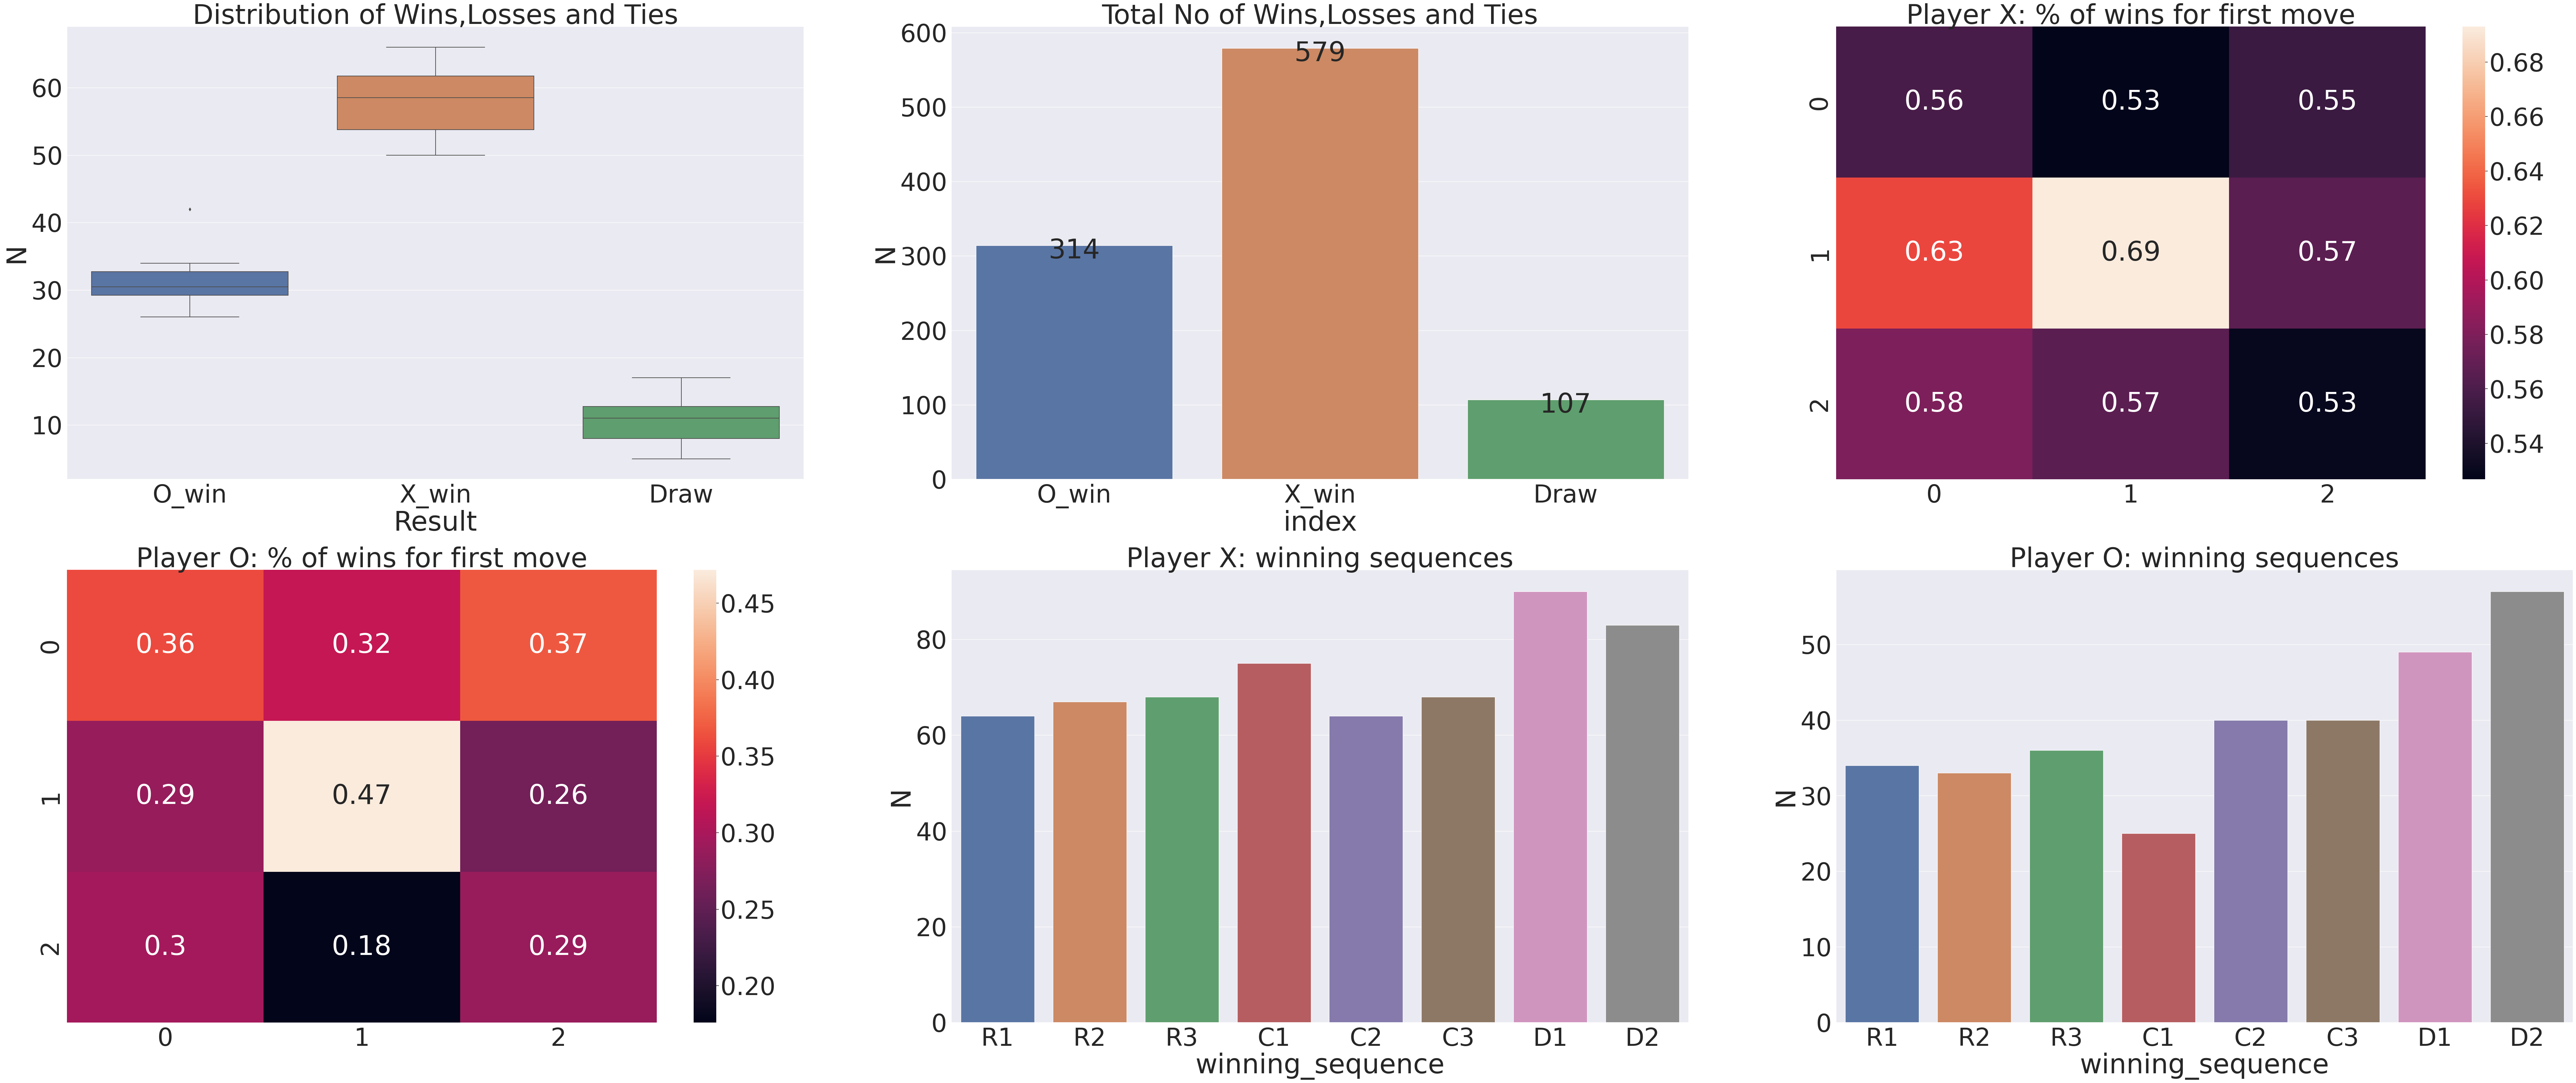

In [40]:
plot_results(win_statistics)

These results indicates that when both players are using a random policy, X wins a majority of games due to first mover advantage.

For both players, occupying the central square in the first move mazimizes the chances of winning.

Further, for both players, the winning sequence is most likely to be along the diagonal.

## Trained X vs Random O

Now we will create a function to train the agents using the Q-Learning algorithm.

100%|██████████| 5000/5000 [00:43<00:00, 115.80it/s]
/home/nitish/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nitish/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nitish/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/nitish/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be remove

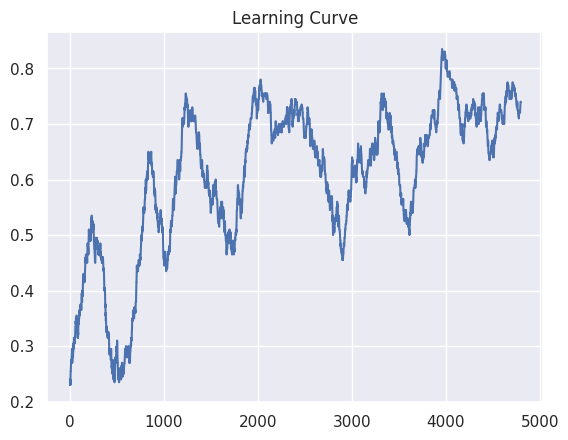

In [41]:
np.random.seed(1)
#,_,rewards_X,rewards_O = train(Q_X, Q_O,n_games=8000,alpha = 0.5, gamma = 0.9,train_X=True,train_O=False)
Q_X,_,rewards_X,rewards_O = train(n_games=5000,alpha = 0.5, gamma = 0.9,train_X=True,train_O=False,is_random=True)
Q_X_trained = Q_X

In [42]:
win_statistics = get_win_statistics(Q_X_trained,Q_O,sets = 10, games_in_set = 100,X_strategy = 'greedy', \
                                    O_strategy='eps_greedy',eps_X=1.0,eps_O=1.0)

100%|██████████| 100/100 [00:00<00:00, 117.79it/s]


In [43]:
plot_results(win_statistics)

/home/nitish/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nitish/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nitish/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nitish/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Figure size 640x480 with 0 Axes>

These results indicate that player X has learned to easily beat a random player O. 
Player X consistently chooses the top right hand box and seem to win the majority of games through the right most column (C3) or the off diagonal(D2).

## Random X vs Trained O

Now we will train O to play against a random X

In [ ]:
np.random.seed(1)
#,_,rewards_X,rewards_O = train(Q_X, Q_O,n_games=8000,alpha = 0.5, gamma = 0.9,train_X=True,train_O=False)
_,Q_O,rewards_X,rewards_O = train(n_games=20000,alpha = 0.5, gamma = 0.5,train_X=False,train_O=True,is_random=True)
Q_O_trained = Q_O

The learning curve indicates training has converged after about 15000 games.

In [ ]:
win_statistics = get_win_statistics(Q_X,Q_O_trained,sets = 10, games_in_set = 100,X_strategy = 'eps_greedy',O_strategy='greedy',eps_X=1.0,
                   eps_O=1.0)

In [ ]:
plot_results(win_statistics)

The above results indicate that Player O has learned to consistently beat  the random player X. What is interesting to note is that the RL approach results in Player O beating Player X more consistently (85%) of the time than when using the Minimax approach (~ 81%).

We can also see the player O consistently picks boxes along the leading diagonal as its first move. Most of its wins come from occupying the leading diagonal(D1) or the middle column(C2).

## Trained X vs Trained O

Now we will pit the two trained players against each other.

In [ ]:
win_statistics = get_win_statistics(Q_X_trained,Q_O_trained,sets = 10, games_in_set = 100,X_strategy = 'greedy',O_strategy='greedy',eps_X=1.0,
                   eps_O=1.0)

In [ ]:
plot_results(win_statistics)

When the two trained agents face off, all games end in ties.

## Retrained X vs Trained O

Initially we trained X against a random O, now we will retrain X against a trained O

In [ ]:
np.random.seed(1)
Q_X,Q_O,rewards_X,rewards_O = train(n_games=1000,alpha = 0.5, gamma = 0.9,train_X=True,train_O=False,is_random=False,Q_O = Q_O_trained)
Q_X_retrained = Q_X

In [ ]:
win_statistics= get_win_statistics(Q_X_retrained,Q_O_trained,sets = 10, games_in_set = 100,X_strategy = 'greedy',\
                                   O_strategy='greedy',eps_X=1.0,eps_O=1.0)

In [ ]:
plot_results(win_statistics)

The re-trained player X beats the trained Player in 100% of the games.

## Conclusion

Reinforcement learning is a powerful paradigm in AI that can potentially be the key to solving several real world problems. Although the early days of RL has seen an almost exclusively focus on games, there are several practical applications of RL outside of games that industry is working on. At Oracle, we are working on a potentially category defining product that uses reinforcement learning at its core. Watch this space for more! 

## Test Cases

### Test Cases for player X

In [ ]:
def test_X():
    t_board = TicTacToe(player = 'X',reward_type ='action_penalty')
    assert t_board.board_to_state() == (0, 0, 0, 0, 0, 0, 0, 0, 0) , "Board not initializing in the right state"
    t_board.my_move((0,0))
    t_board.opponent_move((0,1))
    t_board.my_move((1,2))
    t_board.opponent_move((2,2))
    t_board.my_move((1,1))
    t_board.opponent_move((0,2))
    current_state = t_board.board_to_state()
    assert current_state == (1, 2, 2, 0, 1, 1, 0, 0, 2) , "Moves work as expected"
    next_states = t_board.get_next_states()
    assert len(next_states) == 6 , "Number of next states is not being computed correctly"
    assert next_states == {(1, 2, 2, 0, 1, 1, 1, 2, 2),
                             (1, 2, 2, 0, 1, 1, 2, 1, 2),
                             (1, 2, 2, 1, 1, 1, 0, 2, 2),
                             (1, 2, 2, 1, 1, 1, 2, 0, 2),
                             (1, 2, 2, 2, 1, 1, 0, 1, 2),
                             (1, 2, 2, 2, 1, 1, 1, 0, 2)} , "Next states not being computed correctly"
    assert t_board.get_action((1, 2, 2, 0, 1, 1, 1, 2, 2)) == 6, "Next action not being computed correctly"
    assert t_board.get_action((1, 2, 2, 0, 1, 1, 2, 1, 2)) == 7, "Next action not being computed correctly"
    np.random.seed(0)
    V = { state: np.random.rand() for state in next_states}
    assert t_board.pick_best_action(V,action_type = 'greedy',eps=0.05) == (2,1) , "Pick best action not working "
    t_board.my_move((2,1))
    t_board.opponent_move((1,0))
    assert t_board.get_next_states() == {(1, 2, 2, 2, 1, 1, 1, 1, 2)} , "Next state not being computed correctly if \
                                                                    terminal state"
    assert t_board.pick_best_action(V,action_type = 'greedy',eps=0.05) == (2,0), "Best action not correctly computed for \
                terminal state"
    print("test cases for player X passed")

In [ ]:
test_X()

## Test Cases for Player O

In [ ]:
def test_O():
    t_board = TicTacToe(player = 'O',reward_type ='action_penalty')
    t_board.opponent_move((0,0))
    t_board.my_move((0,1))
    t_board.opponent_move((1,1))
    t_board.my_move((2,1))
    t_board.opponent_move((1,0))
    t_board.my_move((0,2))
    t_board.opponent_move((2,2))
    assert t_board.board_to_state() == (1, 2, 2, 1, 1, 0, 0, 2, 1) , "Moves not being recorded correctly"
    assert t_board.get_next_states() == {(1, 2, 2, 1, 1, 1, 2, 2, 1), (1, 2, 2, 1, 1, 2, 1, 2, 1)}, "Next states not being \
                                            computed correctly"
    
    assert t_board.get_action((1, 2, 2, 1, 1, 1, 2, 2, 1)) == 6 , "Next actions not computed correctly"
    assert t_board.get_action((1, 2, 2, 1, 1, 2, 1, 2, 1)) == 5 , "Next actions not computed correctly"
    np.random.seed(2)
    next_states = t_board.get_next_states()
    V = {state:np.random.rand() for state in next_states}
    assert t_board.pick_best_action(V,action_type='greedy') == (2,0) ,"Pick best action not working correctly"
    print("test cases for player O passed")

In [ ]:
test_O()